<h1><center> From Data to Decisions: "Exploring Five Decades of Global Emissions to Inform Environmental Policy"</center></h1>

<center><h3>Group 5: Team Members</h3>Nitin Sai Varma Indukuri, Sahiti Nallamolu, Ishita Gupta</center>
<br>
<center>
    <img src="images/CoverPage.jpg" width=500 />
</center>

## Motivation and Goal:
Global emissions management is a paramount issue in confronting climate change, and understanding the dynamics of greenhouse gas emissions is essential for informed policy-making. The motivation behind this project is to harness decades of global emissions data to uncover trends and variances across different sectors and substances.

-  The aim is to systematically analyze [Global Emissions](https://edgar.jrc.ec.europa.eu/report_2023) data from 1970 to 2022 to discern patterns in emissions on a worldwide scale. By evaluating the data, we intend to pinpoint key contributors to emissions, observe how they have changed over time, and understand the effectiveness of past and current environmental policies.

-  Our goal is to identify critical areas where emissions reduction is most needed and provide robust, data-driven recommendations for enhancing global environmental policies. This analysis will serve as a foundation for stakeholders to formulate strategies that effectively address the challenges posed by global emissions

## Part 1 - Data Exploration and Preprocessing

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the excel as Dataframe

df = pd.read_excel("data/GHG_sector_and_country.xlsx")

developing_countries_df = pd.read_excel('data/Developing Countries.xlsx')

In [3]:
# Checking the DataFrames
df.head()

,Substance,Sector,EDGAR Country Code,Country,1970,1971,1972,1973,1974,1975,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,CO2,Agriculture,AFG,Afghanistan,0.029229,0.029229,0.029229,0.029229,0.039967,0.045310,...,0.055157,0.084490,0.116967,0.162800,0.310881,0.160914,0.150438,0.064795,0.054361,0.046161
1,CO2,Agriculture,ALB,Albania,0.113300,0.113300,0.113300,0.113300,0.113614,0.112514,...,0.032738,0.056624,0.058719,0.049605,0.056676,0.048976,0.069405,0.063067,0.063936,0.064880
2,CO2,Agriculture,ARG,Argentina,0.104343,0.104343,0.104343,0.104343,0.087214,0.077314,...,0.999167,1.145152,0.892257,1.359547,1.278200,1.636119,1.703062,1.925471,2.108103,2.323375
3,CO2,Agriculture,ARM,Armenia,0.055288,0.055288,0.055288,0.055288,0.059966,0.059966,...,0.021686,0.022629,0.022629,0.022471,0.034257,0.035986,0.043738,0.035410,0.036038,0.036771
4,CO2,Agriculture,AUS,Australia,0.311143,0.311143,0.311143,0.311143,0.311143,0.268190,...,2.128866,2.182924,2.291771,2.505224,2.641204,2.155371,2.290200,2.433043,2.452371,2.471969


In [4]:
# Checking the DataFrames
developing_countries_df.head()

,Country
0,Bahamas
1,Malaysia
2,Thailand
3,Bulgaria
4,Seychelles


In [5]:
# Shape of the dataframe
print("Number of Rows:",df.shape[0])
print("Number of Columns:",df.shape[1])

# Summary Stats
print("\nSummary:\n")
print(df.describe())

Number of Rows: 4830
Number of Columns: 57

Summary:

              1970         1971         1972         1973         1974  \
count  4698.000000  4698.000000  4700.000000  4707.000000  4705.000000   
mean     11.410476    11.452468    11.879115    12.422508    12.422590   
std     128.113766   128.065351   133.148407   139.497813   139.471494   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.001665     0.001695     0.001808     0.001853     0.001932   
50%       0.041134     0.041850     0.042937     0.044825     0.046190   
75%       0.719287     0.732181     0.774795     0.808176     0.855565   
max    3823.699383  3910.981426  4189.105946  4524.711259  4603.893544   

              1975         1976         1977         1978         1979  ...  \
count  4707.000000  4716.000000  4717.000000  4722.000000  4724.000000  ...   
mean     12.422969    12.944644    13.229576    13.507054    13.832068  ...   
std     139.851616   146.197141   150.0914

In [6]:
# print("\nData Types:\n")
print(df.dtypes)

Substance              object
Sector                 object
EDGAR Country Code     object
Country                object
1970                  float64
1971                  float64
1972                  float64
1973                  float64
1974                  float64
1975                  float64
1976                  float64
1977                  float64
1978                  float64
1979                  float64
1980                  float64
1981                  float64
1982                  float64
1983                  float64
1984                  float64
1985                  float64
1986                  float64
1987                  float64
1988                  float64
1989                  float64
1990                  float64
1991                  float64
1992                  float64
1993                  float64
1994                  float64
1995                  float64
1996                  float64
1997                  float64
1998                  float64
1999      

In [7]:
# Missing Value Inspection
print("\nMissing Values:\n")
print(df.isna().sum())


Missing Values:

Substance               2
Sector                  2
EDGAR Country Code      2
Country                 2
1970                  132
1971                  132
1972                  130
1973                  123
1974                  125
1975                  123
1976                  114
1977                  113
1978                  108
1979                  106
1980                  120
1981                  119
1982                  120
1983                  114
1984                  115
1985                  111
1986                  111
1987                  111
1988                  111
1989                  113
1990                  108
1991                  114
1992                  109
1993                  109
1994                  108
1995                  103
1996                   97
1997                   98
1998                  100
1999                  105
2000                  111
2001                   97
2002                  104
2003                

**Data Types**: 
- The Substance, Sector, EDGAR Country Code, and Country columns are of type object, indicating they contain categorical or string data.
- The columns from 1970 to 2022 are of type float64, representing numerical data for annual emissions.

**Missing Values**:

- The columns Substance, Sector, EDGAR Country Code, and Country each have 2 missing entries.
- Year columns show varying numbers of missing entries, with a general trend of fewer missing values in recent years. For instance, 1970 has 132 missing values while 2022 has 86.

### Helper Functions

In [8]:
# Returns the list of countries
def getCountries(dataframe):
    return dataframe['Country'].unique().tolist()

In [9]:
# Returns the list of Sectors
def getSectors(dataframe):
    return dataframe['Sector'].unique().tolist()

In [10]:
# Returns the list of Substances
def getSubstance(dataframe):
    return dataframe['Substance'].unique().tolist()


In [11]:
# Returns a dictionary by 'Country' and get unique 'Sector' for each

def get_sectors_by_country(dataframe):
    return dataframe.groupby('Country')['Sector'].unique().apply(list).to_dict()

In [12]:
# Returns a list of years 

def get_years(dataframe):
    return [col for col in df.columns if isinstance(col, int) or col.isdigit()]    

In [13]:
# Return STRING country code for a partcular country

def get_country_code(dataframe, country):
    return dataframe[(df['Country'] == country)]['EDGAR Country Code'].unique()[0]

**We observe that the rows with missing categorical data are same (Row-4778 and Row-4804)**

**Hence, we drop the entire row from the dataset**

In [14]:
# Define the list of categorical columns
categorical_columns = ['Substance', 'Sector', 'EDGAR Country Code', 'Country']

# Check for rows with missing categorical values
missing_categorical_rows = df[categorical_columns].isnull().any(axis=1)
missing_rows = df[missing_categorical_rows]

# Display the rows with missing values
print(missing_rows)

     Substance Sector EDGAR Country Code Country  1970  1971  1972  1973  \
4778       NaN    NaN                NaN     NaN   NaN   NaN   NaN   NaN   
4804       NaN    NaN                NaN     NaN   NaN   NaN   NaN   NaN   

      1974  1975  ...  2013  2014  2015  2016  2017  2018  2019  2020  2021  \
4778   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4804   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

      2022  
4778   NaN  
4804   NaN  

[2 rows x 57 columns]


In [15]:
# removing rows with NaN data
df = df.drop(missing_rows.index)

## Data Profiling 
We are finding the unique countries, sectors and substances

### Number of Countries

In [16]:
countries = getCountries(df)

print("Number of Countries : ", len(countries))
print("\n")
print(*countries, sep =',')

Number of Countries :  212


Afghanistan,Albania,Argentina,Armenia,Australia,Austria,Azerbaijan,Belgium,Bangladesh,Bulgaria,Bosnia and Herzegovina,Belarus,Brazil,Canada,Switzerland and Liechtenstein,Chile,China,Côte d’Ivoire,Cameroon,Colombia,Costa Rica,Cuba,Cyprus,Czechia,Germany,Denmark,Dominican Republic,Algeria,Ecuador,Egypt,Spain and Andorra,Estonia,Ethiopia,Finland,France and Monaco,United Kingdom,Georgia,Greece,Guatemala,Croatia,Hungary,Indonesia,India,Ireland,Iran,Iraq,Iceland,Israel and Palestine, State of,Italy, San Marino and the Holy See,Jordan,Japan,Kazakhstan,Kenya,Kyrgyzstan,South Korea,Kuwait,Lebanon,Libya,Sri Lanka,Lithuania,Latvia,Morocco,Moldova,Mexico,North Macedonia,Mali,Myanmar/Burma,Mauritius,Malaysia,Nigeria,Nicaragua,Netherlands,Norway,Nepal,New Zealand,Pakistan,Peru,Philippines,Poland,North Korea,Portugal,Paraguay,Qatar,Romania,Russia,Saudi Arabia,Serbia and Montenegro,Sudan and South Sudan,Senegal,El Salvador,Slovakia,Slovenia,Sweden,Syria,Thailand,Tajikistan

We observe that the last four countries [International Aviation, International Shipping, EU27, GLOBAL TOTAL] are not Valid countries : **Corrected Below**

### Dropping non valid country values:

In [17]:
def drop_rows_by_countries(df, countries):
    return df.drop(df[df['Country'].isin(countries)].index)

In [18]:
to_be_dropped_countries = ['International Aviation', 'International Shipping', 'EU27','GLOBAL TOTAL']
df = drop_rows_by_countries(df, to_be_dropped_countries)

In [19]:
countries = getCountries(df)

print("Number of Countries : ", len(countries))
print("\n")
print(*countries, sep=',')

Number of Countries :  208


Afghanistan,Albania,Argentina,Armenia,Australia,Austria,Azerbaijan,Belgium,Bangladesh,Bulgaria,Bosnia and Herzegovina,Belarus,Brazil,Canada,Switzerland and Liechtenstein,Chile,China,Côte d’Ivoire,Cameroon,Colombia,Costa Rica,Cuba,Cyprus,Czechia,Germany,Denmark,Dominican Republic,Algeria,Ecuador,Egypt,Spain and Andorra,Estonia,Ethiopia,Finland,France and Monaco,United Kingdom,Georgia,Greece,Guatemala,Croatia,Hungary,Indonesia,India,Ireland,Iran,Iraq,Iceland,Israel and Palestine, State of,Italy, San Marino and the Holy See,Jordan,Japan,Kazakhstan,Kenya,Kyrgyzstan,South Korea,Kuwait,Lebanon,Libya,Sri Lanka,Lithuania,Latvia,Morocco,Moldova,Mexico,North Macedonia,Mali,Myanmar/Burma,Mauritius,Malaysia,Nigeria,Nicaragua,Netherlands,Norway,Nepal,New Zealand,Pakistan,Peru,Philippines,Poland,North Korea,Portugal,Paraguay,Qatar,Romania,Russia,Saudi Arabia,Serbia and Montenegro,Sudan and South Sudan,Senegal,El Salvador,Slovakia,Slovenia,Sweden,Syria,Thailand,Tajikistan

### Number of Sectors

In [20]:
sectors = getSectors(df)

print("Number of Sectors : ", len(sectors))
print("\n")
print(*sectors, sep='\n')

Number of Sectors :  8


Agriculture
Buildings
Fuel Exploitation
Industrial Combustion
Power Industry
Processes
Transport
Waste


### Number of Substances

In [21]:
substances = getSubstance(df)

print("Number of Substances : ", len(substances))
print("\n")
print(*substances, sep='\n')

Number of Substances :  4


CO2
GWP_100_AR5_CH4
GWP_100_AR5_F-gases
GWP_100_AR5_N2O


We observe that the column names are complex : **Corrected Below**

### Renaming the 'Substance' column in the dataset to simplified values:

In [22]:
def renameSubstance(df,rename_map):
    
    df['Substance'] = df['Substance'].replace(rename_map)
    return df

In [23]:
rename_map = {
'GWP_100_AR5_CH4': 'CH4',
'GWP_100_AR5_F-gases': 'F-gases',
'GWP_100_AR5_N2O' : 'N2O'
}

df = renameSubstance(df, rename_map)

In [24]:
substances = getSubstance(df)

print("Number of Substances : ", len(substances))
print("\n")
print(*substances, sep='\n')

Number of Substances :  4


CO2
CH4
F-gases
N2O


### Number of Sectors per Country

In [25]:
sectors_by_country_dict =  get_sectors_by_country(df)

for country, sectors in sectors_by_country_dict.items():
    print(f"{country} : {len(sectors)}")

Afghanistan : 8
Albania : 8
Algeria : 8
Angola : 8
Anguilla : 7
Antigua and Barbuda : 8
Argentina : 8
Armenia : 8
Aruba : 7
Australia : 8
Austria : 8
Azerbaijan : 8
Bahamas : 8
Bahrain : 8
Bangladesh : 8
Barbados : 8
Belarus : 8
Belgium : 8
Belize : 8
Benin : 8
Bermuda : 7
Bhutan : 8
Bolivia : 8
Bosnia and Herzegovina : 8
Botswana : 8
Brazil : 8
British Virgin Islands : 7
Brunei : 8
Bulgaria : 8
Burkina Faso : 8
Burundi : 8
Cabo Verde : 8
Cambodia : 8
Cameroon : 8
Canada : 8
Cayman Islands : 7
Central African Republic : 8
Chad : 8
Chile : 8
China : 8
Colombia : 8
Comoros : 8
Congo : 8
Cook Islands : 8
Costa Rica : 8
Croatia : 8
Cuba : 8
Curaçao : 7
Cyprus : 8
Czechia : 8
Côte d’Ivoire : 8
Democratic Republic of the Congo : 8
Denmark : 8
Djibouti : 8
Dominica : 8
Dominican Republic : 8
Ecuador : 8
Egypt : 8
El Salvador : 8
Equatorial Guinea : 8
Eritrea : 8
Estonia : 8
Eswatini : 8
Ethiopia : 8
Falkland Islands : 7
Faroes : 4
Fiji : 8
Finland : 8
France and Monaco : 8
French Guiana : 8
F

We observe the not all countries have data from all sectors : : **Corrected Below**

### Finding missing sectors per country:

In [26]:
def find_missing_sectors_per_country(data, all_sectors):
    countries = data['Country'].unique()
    missing_sectors = {}
    print("INITIAL DATA LENGTH : ", data.shape)
    
    # Check for missing sectors in each country
    for country in countries:
        present_sectors = data[data['Country'] == country]['Sector'].unique()
        missing_sectors_list = [sector for sector in all_sectors if sector not in present_sectors]
        if len(missing_sectors_list) > 0 :
            missing_sectors[country] = missing_sectors_list

    print("FINAL DATA LENGTH : ", data.shape)
    return missing_sectors

In [27]:
missing_sectors_dict = find_missing_sectors_per_country(df, sectors)
print(missing_sectors_dict)

INITIAL DATA LENGTH :  (4769, 57)
FINAL DATA LENGTH :  (4769, 57)
{'Aruba': ['Agriculture'], 'Anguilla': ['Agriculture'], 'Curaçao': ['Agriculture'], 'Bermuda': ['Agriculture'], 'Cayman Islands': ['Agriculture'], 'Western Sahara': ['Agriculture', 'Fuel Exploitation'], 'Falkland Islands': ['Agriculture'], 'Greenland': ['Fuel Exploitation'], 'Palau': ['Agriculture'], 'Saint Helena, Ascension and Tristan da Cunha': ['Agriculture'], 'British Virgin Islands': ['Agriculture'], 'Gibraltar': ['Agriculture', 'Fuel Exploitation', 'Industrial Combustion'], 'Faroes': ['Fuel Exploitation', 'Industrial Combustion', 'Power Industry', 'Transport']}


### Handling missing data:

The idea is to fill the missing year data of emission with :
- the mean of that country's emission for that particular substance across different sectors in that year itself
- If no emission of that substance exists in that year, then fill the value with zero

In [28]:
#Calculate the mean emission of a substance for a particulr country and year in all sectors.

def calculate_mean_emission(data, country, year, substance):
    filtered_data = data[(data['Country'] == country) & (data['Substance'] == substance)]
    
    mean_emission = filtered_data[year].mean()
    
    return mean_emission

In [29]:
def fill_missing_values(data):
    
    for year in get_years(data):
        for _, row in data[data[year].isnull()].iterrows():
            
            # Check if mean is NaN
            mean_emission = calculate_mean_emission(data, row['Country'], year, row['Substance'])
    
            # Fill the value with zero if no emission of that substance is found for that year
            if np.isnan(mean_emission):
                mean_emission = 0.0
            
            data.loc[(data['Country'] == row['Country']) & (data['Substance'] == row['Substance']) 
                   &(data['Sector'] == row['Sector']) & (data[year].isnull()), year] = mean_emission
    return data

df = fill_missing_values(df)    

In [30]:
print("\nMissing Values:\n")
print(df.isna().sum())


Missing Values:

Substance             0
Sector                0
EDGAR Country Code    0
Country               0
1970                  0
1971                  0
1972                  0
1973                  0
1974                  0
1975                  0
1976                  0
1977                  0
1978                  0
1979                  0
1980                  0
1981                  0
1982                  0
1983                  0
1984                  0
1985                  0
1986                  0
1987                  0
1988                  0
1989                  0
1990                  0
1991                  0
1992                  0
1993                  0
1994                  0
1995                  0
1996                  0
1997                  0
1998                  0
1999                  0
2000                  0
2001                  0
2002                  0
2003                  0
2004                  0
2005                  0
2006                  

## Part 2 - Analysis of Global Emissions Trends (across Sectors, Substances, and Countries)


<center>
    <img src="images/VisualRepresentation.jpg" width=500 />
</center>

## Trend Analysis


We will analyze the trend of total greenhouse gas emissions over the years on a global scale, and then we'll identify key factors contributing to these trends to better understand their implications.

### Trend of total GHG emissions over the years globally.

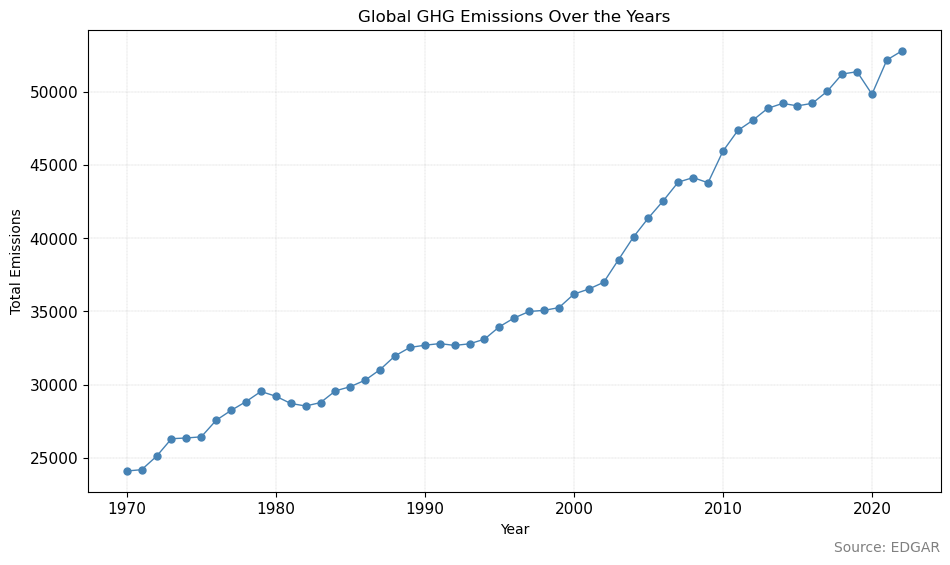

In [31]:
# Sum of emissions across all countries and sectors for every year

global_yearly_emissions = df.drop(columns=['Substance', 'EDGAR Country Code', 'Country', 'Sector']).sum()

plt.figure(figsize=(11, 6))
plt.plot(global_yearly_emissions.index, global_yearly_emissions.values, marker='o', color='steelblue', linewidth=1.0, markersize=5)
plt.grid(True, linestyle='--', linewidth=0.2, color='grey', alpha=0.7)
plt.title('Global GHG Emissions Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Emissions')
ax = plt.gca()
ax.set_facecolor('white')
ax.figure.set_facecolor('white')
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.tick_params(axis='both', which='major', labelsize=11)
plt.figtext(0.9, 0.01, 'Source: EDGAR', horizontalalignment='right', color='grey', fontsize=10)
plt.show()

- There is an overall increasing trend in global GHG emissions over the timeframe presented. This indicates a rising trajectory in the volume of greenhouse gases released into the atmosphere, which is a significant concern for global warming and climate change.
- It seems there is a slight dip in the most recent data points. This could be due to a variety of factors, including the global response to climate change, advances in technology, or even short-term factors such as the economic impact of the COVID-19 pandemic.

### Pandemic Impact Evaluation

We will evaluate the impact of the pandemic on various sectors, analyzing shifts in activity and emissions, and then we'll assess the long-term implications of these changes on environmental policies.

<center>
    <img src="images/Pandemic_Headline_Revised.jpeg" width=500 />
</center>

In [32]:
# Aggregate GHG emissions by sector for the years 2018, 2019, 2020, and 2021
sector_emissions_pre_pandemic = df.groupby('Sector')[[2018, 2019]].sum().mean(axis=1)
sector_emissions_during_pandemic = df.groupby('Sector')[[2020, 2021]].sum().mean(axis=1)

# Difference in emissions from pre-pandemic to during pandemic
sector_change = sector_emissions_during_pandemic - sector_emissions_pre_pandemic

sector_emissions_change = pd.DataFrame({
    'Average Pre-Pandemic': sector_emissions_pre_pandemic,
    'Average During Pandemic': sector_emissions_during_pandemic,
    'Change': sector_change
})

sector_emissions_change.sort_values(by='Change', ascending=False)  

,Average Pre-Pandemic,Average During Pandemic,Change
Sector,,,
Processes,4822.144341,5073.268230,251.123888
Industrial Combustion,6252.167663,6383.541016,131.373353
Agriculture,6310.646305,6438.276777,127.630473
Waste,2612.783668,2692.021263,79.237595
Buildings,3783.084724,3740.645302,-42.439422
Power Industry,14238.417345,14153.513336,-84.904010
Fuel Exploitation,6180.469388,6007.247832,-173.221556
Transport,7081.469105,6505.202551,-576.266553


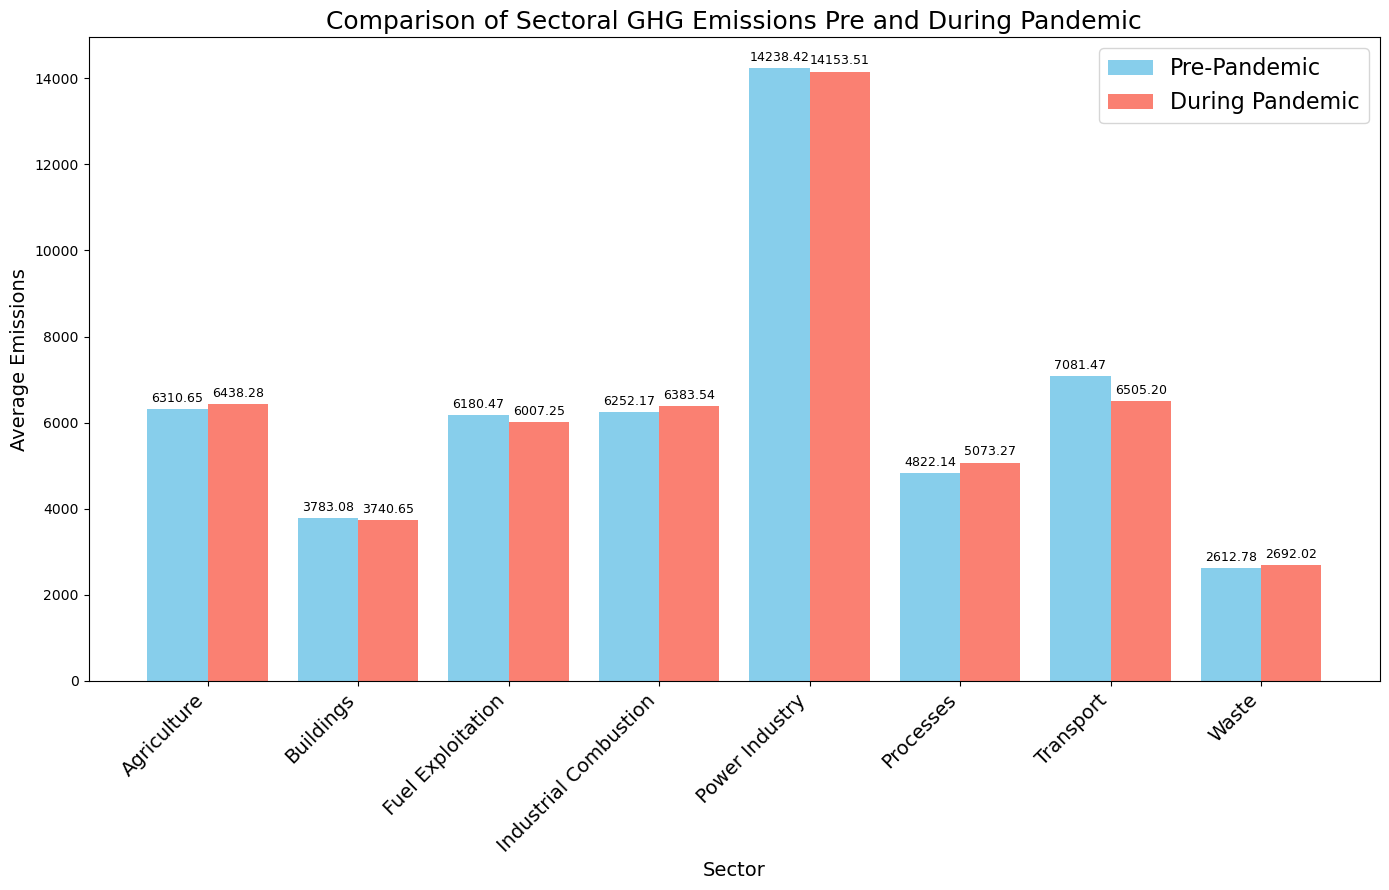

In [33]:
plt.style.use('seaborn-v0_8-pastel')
fig, ax = plt.subplots(figsize=(14, 9))
ind = np.arange(len(sector_emissions_change))
width = 0.4
colors_pre = 'skyblue'
colors_during = 'salmon'


pre_pandemic_bars = ax.bar(ind - width/2, sector_emissions_change['Average Pre-Pandemic'], width,
                           label='Pre-Pandemic', color=colors_pre)


during_pandemic_bars = ax.bar(ind + width/2, sector_emissions_change['Average During Pandemic'], width,
                              label='During Pandemic', color=colors_during)


ax.set_xlabel('Sector', fontsize=14)
ax.set_ylabel('Average Emissions', fontsize=14)
ax.set_title('Comparison of Sectoral GHG Emissions Pre and During Pandemic', fontsize=18)
ax.set_xticks(ind)
ax.set_xticklabels(sector_emissions_change.index, rotation=45, ha='right', fontsize=14)
ax.legend(fontsize=16)


def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

add_labels(pre_pandemic_bars)
add_labels(during_pandemic_bars)

plt.tight_layout()
ax.yaxis.grid(False)
ax.xaxis.grid(False)
plt.show()

**Increase:** Sectors like Processes, Industrial Combustion, Agriculture, and Waste saw an increase in emissions during the pandemic.

**Decrease:** Conversely, the Power Industry, Fuel Exploitation, and Transport sectors experienced a decrease in emissions, with the Transport sector showing the most significant reduction, likely due to reduced travel and economic activity during the pandemic.

The decrease in transport emissions is particularly notable and aligns with the global reduction in travel and commuting activities during the pandemic lockdowns.

## Comparative Analysis

### Percentage of Individual Substance Contribution per Continent


<center>
    <img src="images/Globe_Gas_Names_Headline.jpeg" width=500 />
</center>

In [34]:
import json

def search_code(mapdata, country):
    cont = "NA"  
    for keyval in mapdata:
        if country.lower() == keyval['alpha-3'].lower():
            cont = keyval['region']
            break
    return cont

def get_continent_mapping(df, file='data/continent.csv'):
    col_list = ['alpha-3', 'region']
    mapping_data = pd.read_csv(file, usecols=col_list, sep=',')
    cont_df = df.copy()
    mapdata = mapping_data.to_json(orient='records')
    mapdata = json.loads(mapdata)
    cont_list = []
    for value in df['EDGAR Country Code']:
        output = search_code(mapdata, value)
        cont_list.append(output)
    cont_df['continent'] = cont_list
    return cont_df

# Reading the continent mapping data
continent_path = "data/continent.csv"
continent_df = pd.read_csv(continent_path)

continent_df = get_continent_mapping(df)
year_columns = list(range(1970, 2023))  
col_list_cont_df = ['continent', 'Substance'] + year_columns
cont_df_min = continent_df[col_list_cont_df].copy()
cont_df_min.fillna(0, inplace=True)

cont_df_min['Total_Emissions'] = cont_df_min[year_columns].sum(axis=1)

cont_sub_total_final = cont_df_min.groupby(['Substance', 'continent'])['Total_Emissions'].sum().reset_index()
cont_sub_final = cont_sub_total_final[cont_sub_total_final['continent'] != 'NA']

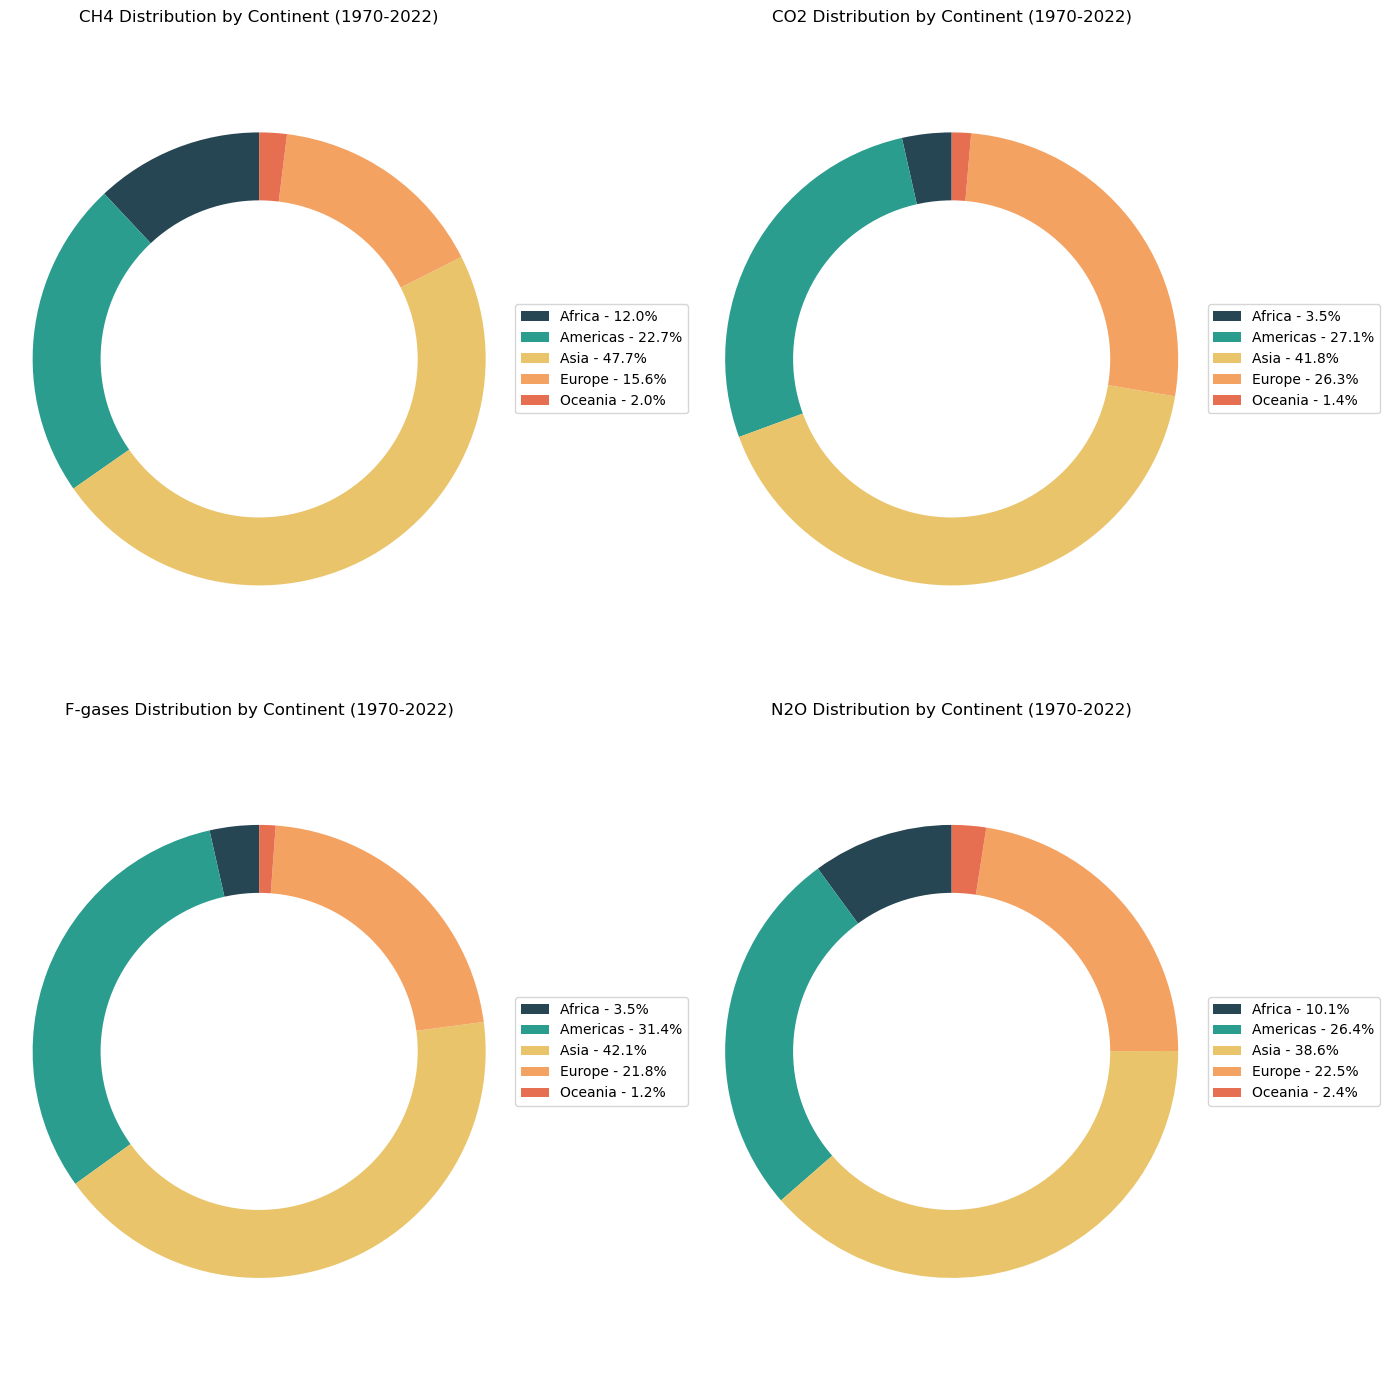

In [35]:
colors = ['#264653', '#2a9d8f', '#e9c46a', '#f4a261', '#e76f51', '#d62828']

n_rows = 2
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 14))
axes = axes.flatten()

substances = cont_sub_final['Substance'].unique()

for i, substance in enumerate(substances):
    ax = axes[i]
    substance_data = cont_sub_final[cont_sub_final['Substance'] == substance]
    
   
    percentages = 100 * substance_data['Total_Emissions'] / substance_data['Total_Emissions'].sum()
    legend_labels = [f'{label} - {percentage:.1f}%' for label, percentage in zip(substance_data['continent'], percentages)]
    
    
    
    wedges, _ = ax.pie(substance_data['Total_Emissions'], startangle=90, colors=colors[:len(substance_data)])
    
    
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    ax.add_artist(centre_circle)
    
    ax.axis('equal')
    ax.set_title(f"{substance} Distribution by Continent (1970-2022)")
    
    ax.legend(wedges, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

### GHG Emissions breakdown by sector in Developing and Developed Countries

We will break down greenhouse gas emissions by sector in both developing and developed countries, comparing the differences in emission sources and intensities, and then we'll explore targeted strategies for each context to reduce these emissions effectively.

<center>
    <img src="images/DevelopingDeveloped.jpg" width=500 />
</center>

In [36]:
developing_countries_set = set(developing_countries_df['Country'].str.strip())

# Separating the GHG data into two, one for developing and the other for developed countries
ghg_developing = df[df['Country'].isin(developing_countries_set)]
ghg_developed = df[~df['Country'].isin(developing_countries_set)]

year_columns = df.columns[5:]

# Aggregating GHG emissions by sector for developing countries and identify the sector with most emissions
developing_sector_totals = ghg_developing.groupby('Sector')[year_columns].sum().sum(axis=1)
sector_most_emissions_developing = developing_sector_totals.idxmax()

# Aggregating GHG emissions by sector for developed countries and identify the sector with most emissions
developed_sector_totals = ghg_developed.groupby('Sector')[year_columns].sum().sum(axis=1)
sector_most_emissions_developed = developed_sector_totals.idxmax()


sector_most_emissions_developing, developing_sector_totals[sector_most_emissions_developing], sector_most_emissions_developed, developed_sector_totals[sector_most_emissions_developed]


('Agriculture', 189705.00123526237, 'Power Industry', 291991.18929897517)

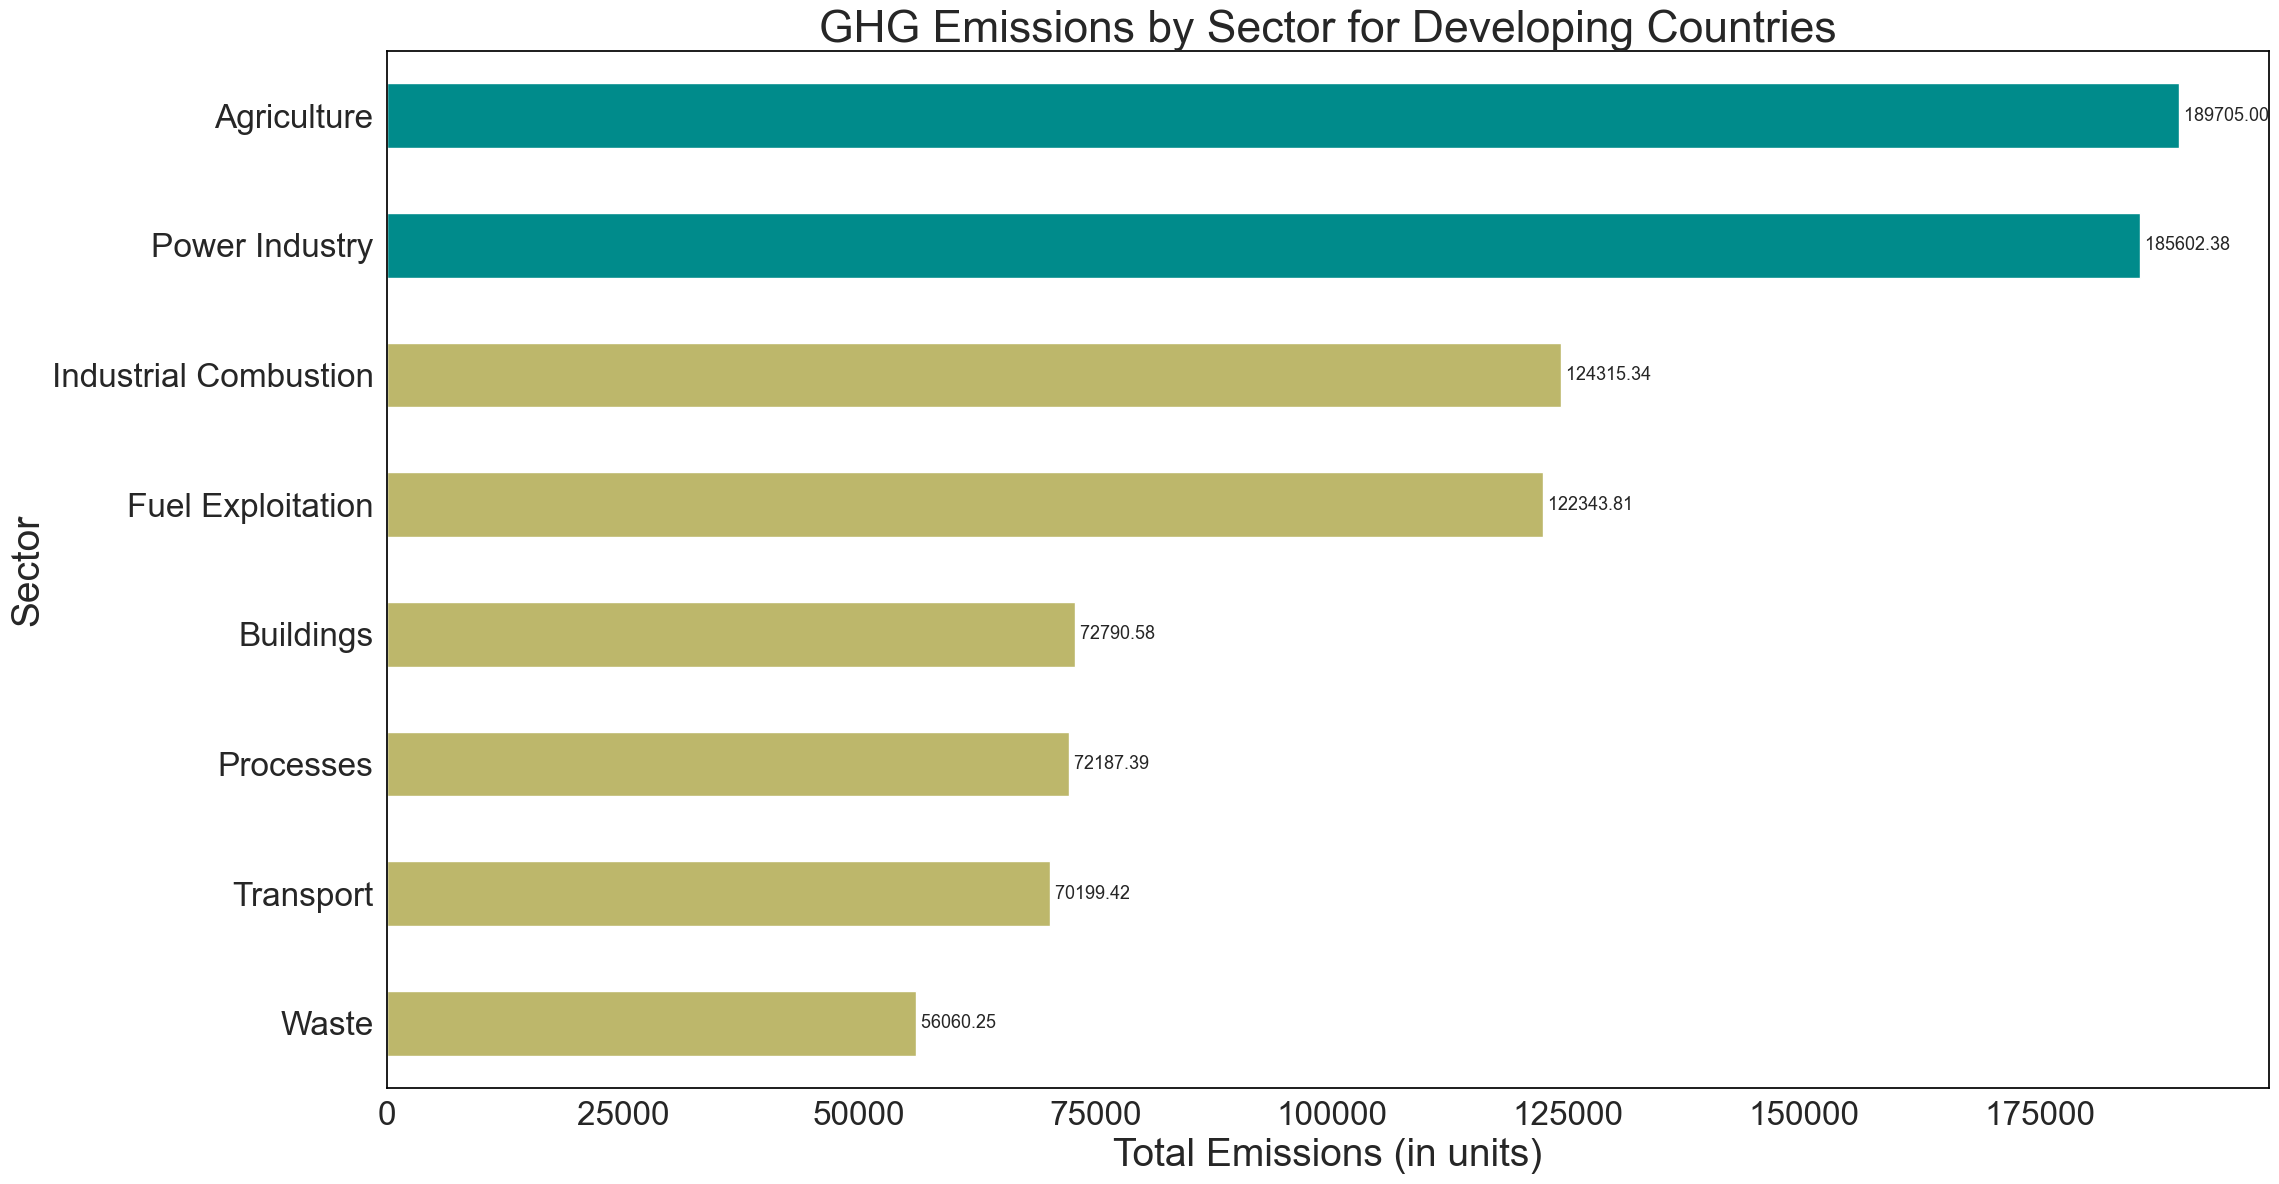

In [37]:
sns.set_theme(style="white")

plt.figure(figsize=(23, 12))

sorted_totals = developing_sector_totals.sort_values(ascending=True)

highlight_color = 'darkcyan' 
other_color = 'darkkhaki'

longest_bars_indices = sorted_totals.tail(2).index

colors = [highlight_color if sector in longest_bars_indices else other_color for sector in sorted_totals.index]

sorted_totals.plot(kind='barh', color=colors, alpha=1)

plt.title('GHG Emissions by Sector for Developing Countries', fontsize=32)
plt.ylabel('Sector', fontsize=28)
plt.xlabel('Total Emissions (in units)', fontsize=28)
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)

for index, value in enumerate(sorted_totals):
    plt.text(value, index, f' {value:.2f}', va='center', fontsize=13)


ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
plt.tight_layout()
plt.show()


**Developing Countries**
- The **Agriculture and Power Industry sectors** are the largest contributors to GHG emissions among the sectors shown. This suggests a critical area for developing countries to focus on for emission reduction strategies.
- Given the substantial emissions from Agriculture, there is an opportunity for these countries to adopt sustainable agricultural practices that could significantly reduce their emissions, such as improved land use and livestock management.
- Developing countries often face the challenge of balancing economic growth with environmental sustainability. This visualization can help prioritize sectors where growth can be coupled with sustainable practices.

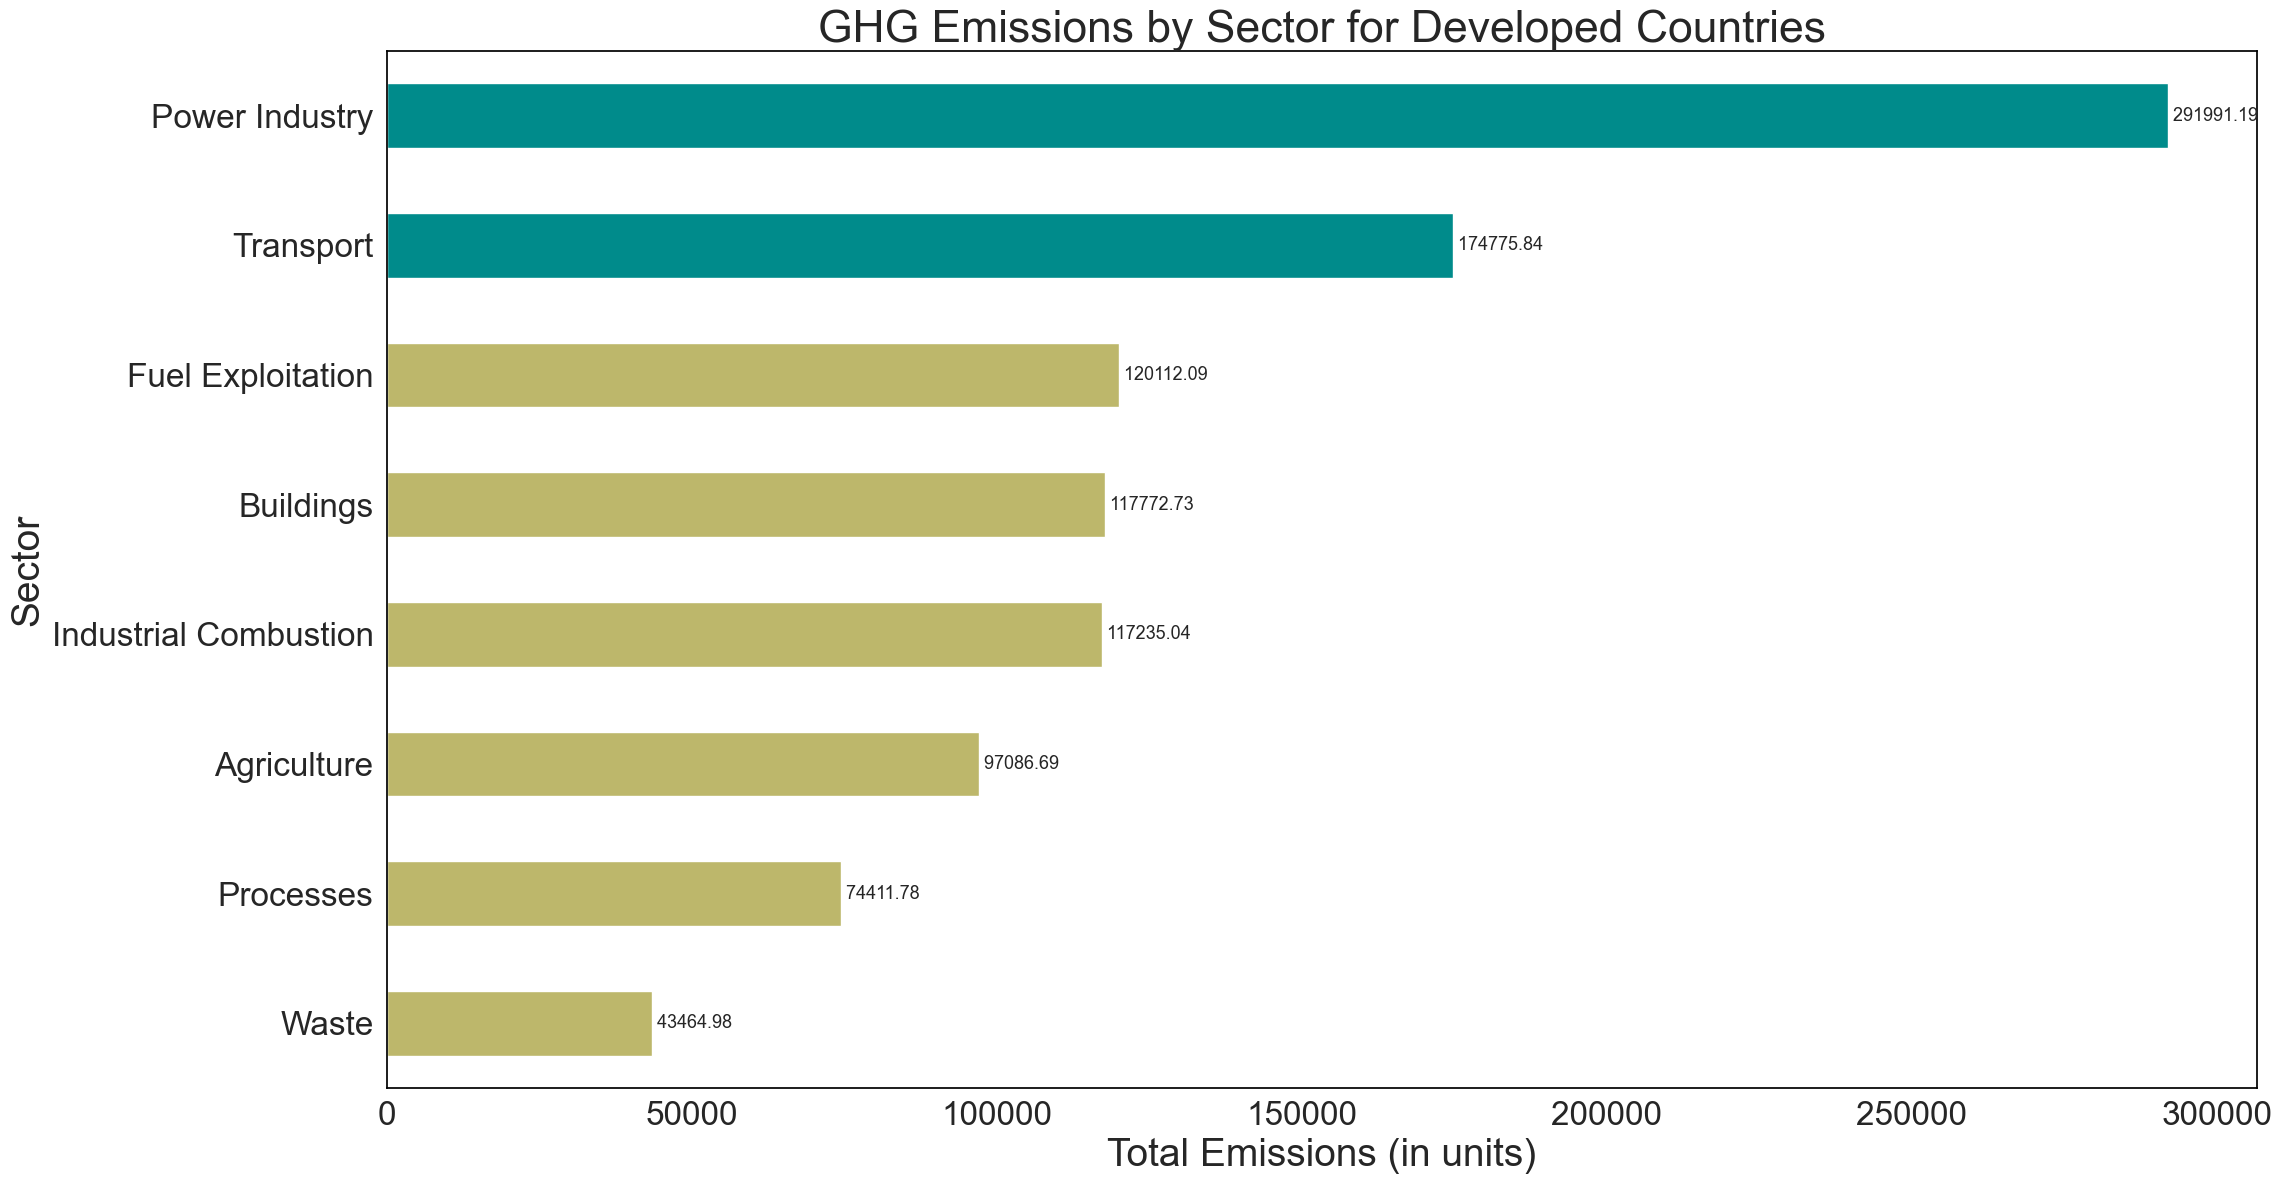

In [38]:
sns.set_theme(style="white")

plt.figure(figsize=(23, 12))

sorted_totals = developed_sector_totals.sort_values(ascending=True)

highlight_color = 'darkcyan'
other_color = 'darkkhaki'

longest_bars_indices = sorted_totals.tail(2).index

colors = [highlight_color if sector in longest_bars_indices else other_color for sector in sorted_totals.index]

sorted_totals.plot(kind='barh', color=colors)

plt.title('GHG Emissions by Sector for Developed Countries', fontsize=32)
plt.ylabel('Sector', fontsize=28)
plt.xlabel('Total Emissions (in units)', fontsize=28)
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)


for index, value in enumerate(sorted_totals):
    plt.text(value, index, f' {value:.2f}', va='center', fontsize=13)

ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
plt.tight_layout()
plt.show()

**Developed Countries**
- The **Power Industry** is the predominant source of GHG emissions, which highlights the significant impact that energy production has on overall emissions. 
- While other sectors such as Fuel Exploitation, Buildings, Industrial Combustion, and Agriculture also contribute to emissions, their impact is relatively smaller compared to the Power Industry and Transport. This indicates different strategic priorities for emissions reduction in developed countries.

### Trend of emissions in different sectors

While this gives us a lot of information about the increasing trends, we can do better.

Let's break it down, and look at how different sectors have emitted green house gases over the years.

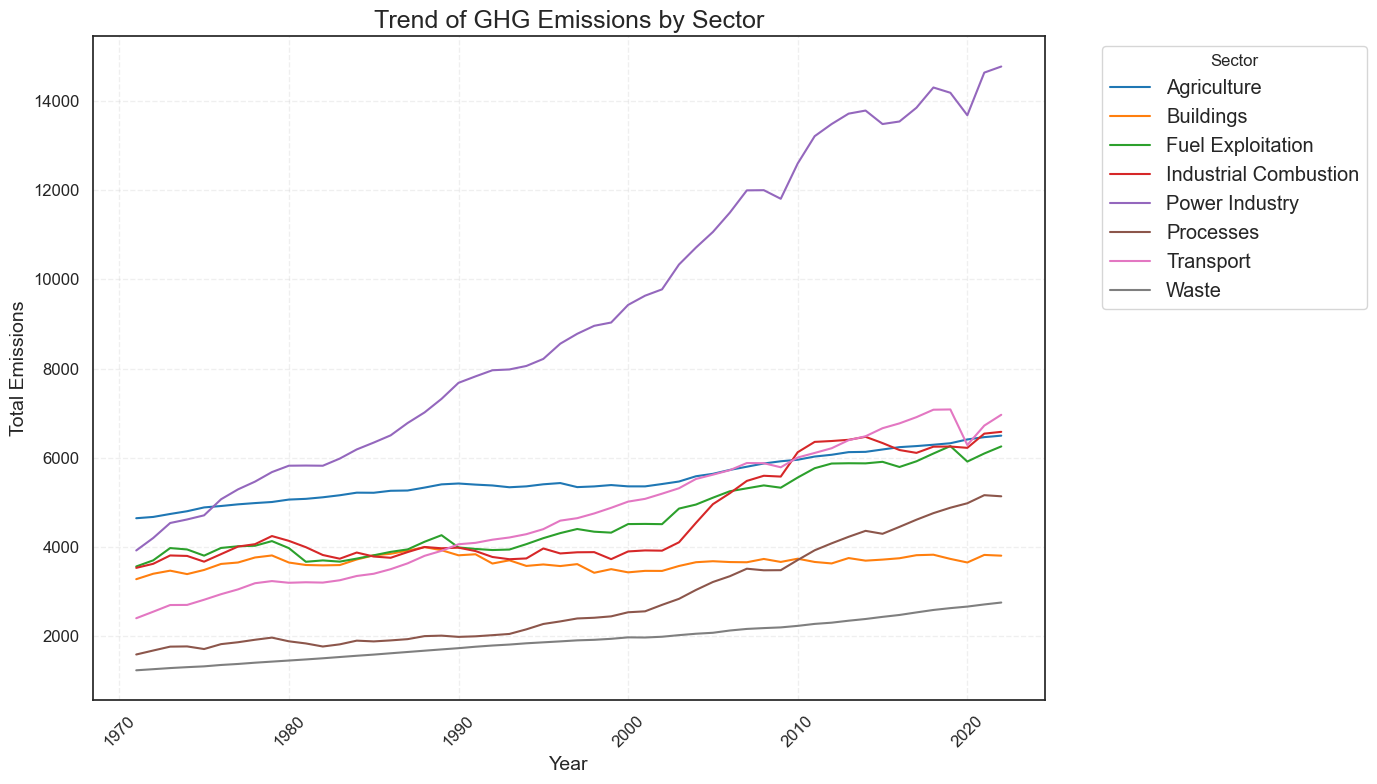

In [39]:
#Trend of GHG Emissions by Sector

years = df.columns[5:]
sector_totals = df.groupby('Sector')[years].sum().transpose()


plt.style.use('seaborn-v0_8-muted')
palette = plt.get_cmap('tab10')
plt.figure(figsize=(14, 8))
for i, sector in enumerate(sector_totals.columns):
    plt.plot(sector_totals.index, sector_totals[sector], marker='', color=palette(i), linewidth=1.5, label=sector)

plt.title('Trend of GHG Emissions by Sector', fontdict={'fontsize': 18})
plt.xlabel('Year', fontdict={'fontsize': 14})
plt.ylabel('Total Emissions', fontdict={'fontsize': 14})
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='large')
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

- The purple line, representing the power industry, shows a significantly higher emission level than other sectors. This indicates a major area where intervention can lead to substantial emissions reductions.
- Most sectors show an increasing trend, with some having steeper growth than others. This could reflect increasing industrial activity, changes in consumption patterns, and economic growth.
- Some sectors, like waste and agriculture, show more stable emissions over time compared to the power industry, indicating different growth patterns and potentially different regulatory impacts.

### Comparison among Top 5 countries producing emissions

We will compare the top five countries producing emissions, examining their emission trends and contributing factors, and then we'll discuss the global and local implications of these emissions on climate policies.

<center>
    <img src="images/Emissions_Comparison.jpeg" width=500 />
</center>

In [40]:
country_totals = df.groupby('Country')[years].sum().sum(axis=1)
top_5_countries = country_totals.nlargest(5)
top_5_countries

Country
China            364148.664815
United States    329082.259413
Russia           125797.008351
India            103426.444334
Japan             66090.384530
dtype: float64

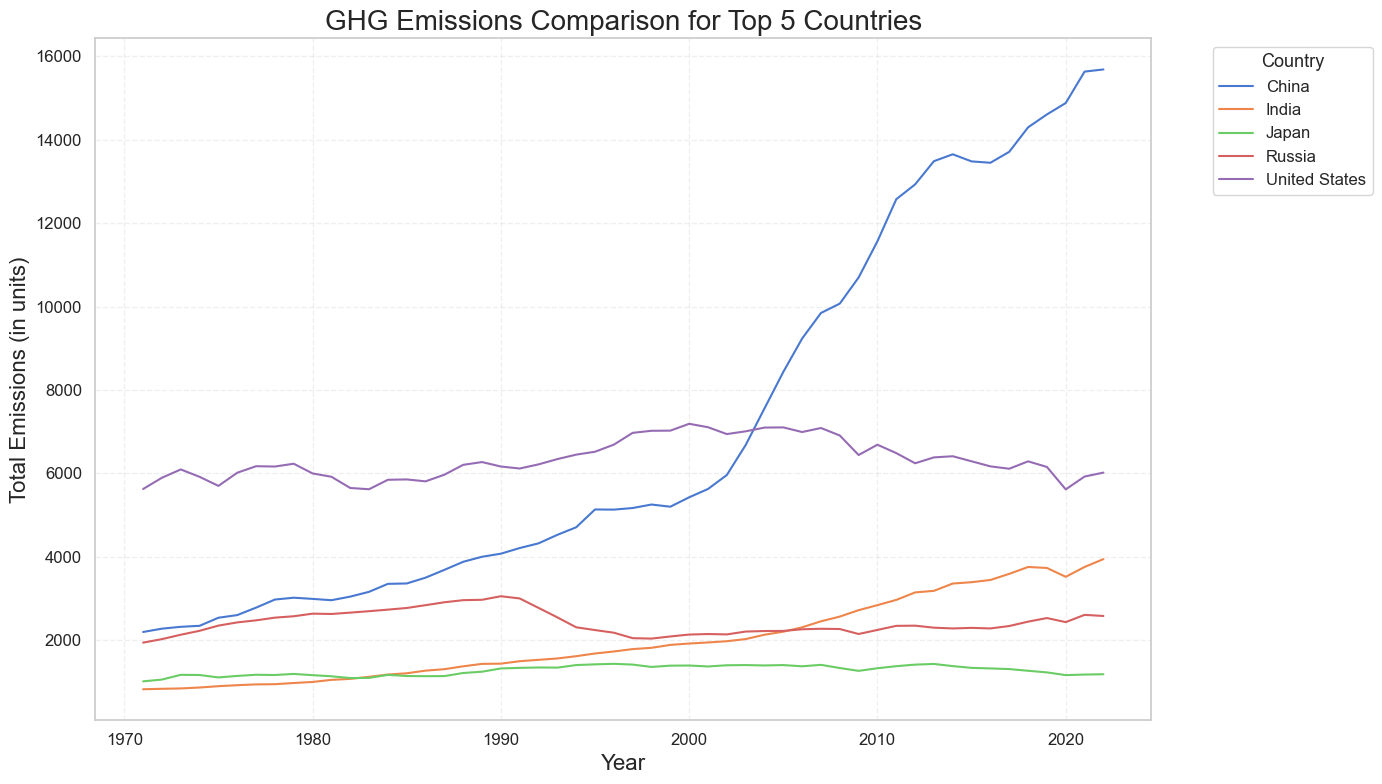

In [41]:
top_5_country_names = top_5_countries.index[0:5]  
top_5_country_data = df[df['Country'].isin(top_5_country_names)].groupby('Country')[years].sum()

sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

colors = sns.color_palette("muted", n_colors=5)

for i, country in enumerate(top_5_country_data.index):
    plt.plot(top_5_country_data.columns, top_5_country_data.loc[country], label=country, color=colors[i], linewidth=1.5)

plt.title('GHG Emissions Comparison for Top 5 Countries', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Total Emissions (in units)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Country', title_fontsize='13', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

**China** - There is a pronounced spike in emissions from China, starting in the early 2000s, showing a rapid industrial expansion phase.

**United States** - The United States shows a more gradual increase with some fluctuations but appears to be stabilizing or decreasing slightly in recent years, possibly indicating the impact of various emissions control policies or a shift towards more renewable energy sources.

**India** -  India shows a steady growth in emissions, correlating with its economic development and increasing energy demand.

**Russia** - Russia exhibits a decline in emissions during the 1990s, potentially reflecting the economic turmoil and industrial restructuring following the dissolution of the Soviet Union, with a return to growth in the 2000s.

**Japan** - Japan's emissions appear relatively flat, which might suggest effective emissions regulations and a mature economy with less industrial growth compared to the other countries.

### GHG Emissions by Sector in India

We will analyze greenhouse gas emissions by sector within our home country, India, identifying the primary sources and trends, and then we'll explore potential solutions to mitigate these emissions effectively.


<center>
    <img src="images/India_Representation.jpeg" width=500 />
</center>

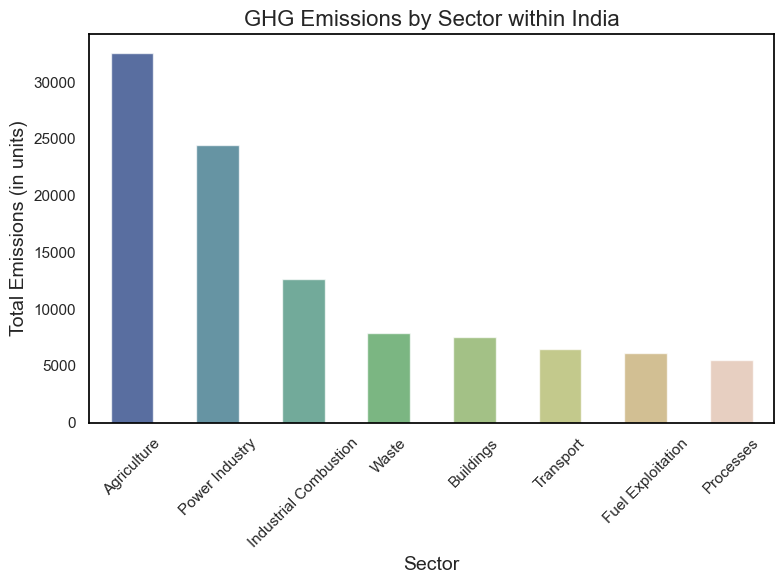

In [42]:
india_data = df[df['Country'] == 'India']
india_sector_totals = india_data.groupby('Sector')[years].sum().sum(axis=1)
sns.set(style="white", rc={"axes.edgecolor": 'black', "axes.facecolor": 'white'})

plt.figure(figsize=(8, 6))

india_sector_totals_sorted = india_sector_totals.sort_values(ascending=False)

colors = sns.color_palette("gist_earth", n_colors=len(india_sector_totals_sorted))

india_sector_totals_sorted.plot(kind='bar', width=0.5, color=colors, alpha = 0.7)

plt.title('GHG Emissions by Sector within India', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Total Emissions (in units)', fontsize=14)
plt.xticks(rotation=45, fontsize=11)
plt.grid(False)

ax = plt.gca()  # Get the current axes
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
plt.tight_layout()
plt.show()

**Agriculture and the Power Industry are shown as the two sectors with the highest emissions.**
- The prominent impact of agriculture indicates the significance of land use, agricultural practices, and livestock management in India's GHG profile.
- Comparing the emissions from sectors like Industrial Combustion and Fuel Exploration to those from Agriculture and Power Industry can inform where incremental versus transformative changes are needed.
- The graph reflects the interplay between economic development and emissions, particularly in the Power Industry sector, where economic growth drives energy demand.

### GHG Emissions by Sector in United States

We will delve into the greenhouse gas emissions by sector in our country of residence, the United States, examining how different industries contribute to the overall emissions, and then we'll assess various strategies to reduce these emissions sustainably.


<center>
    <img src="images/USA_Representation.jpeg" width=500 />
</center>

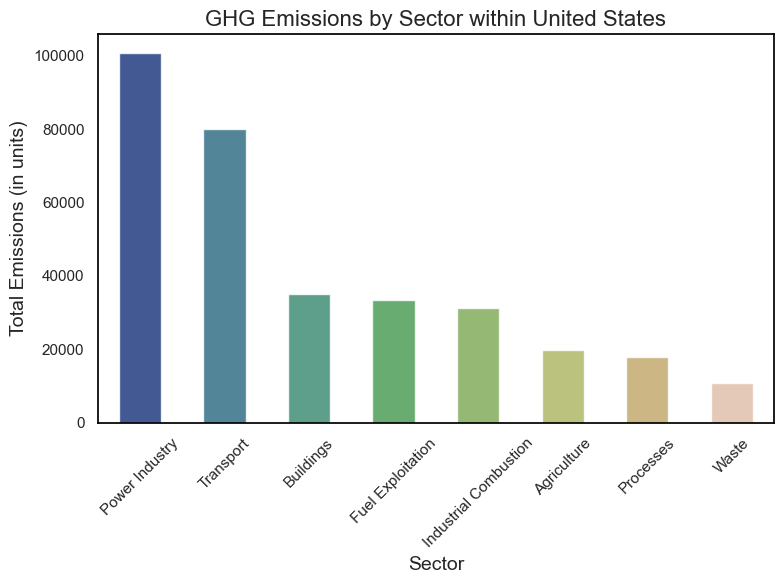

In [43]:
US_data = df[df['Country'] == 'United States']
US_sector_totals = US_data.groupby('Sector')[years].sum().sum(axis=1)

sns.set(style="white", rc={"axes.edgecolor": 'black', "axes.facecolor": 'white'})

plt.figure(figsize=(8, 6))

US_sector_totals_sorted = US_sector_totals.sort_values(ascending=False)

colors = sns.color_palette("gist_earth", n_colors=len(US_sector_totals_sorted))

US_sector_totals_sorted.plot(kind='bar', width=0.5, color=colors, alpha=0.8)

plt.title('GHG Emissions by Sector within United States', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Total Emissions (in units)', fontsize=14)
plt.xticks(rotation=45, fontsize=11)
plt.grid(False)

ax = plt.gca()  # Get the current axes
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
plt.tight_layout()
plt.show()

**The Power Industry and Transport are the largest contributors to GHG emissions in the United States.**
- This highlights two key areas where the U.S. could focus its efforts to reduce emissions significantly.
- The substantial emissions from these sectors suggest that policy measures such as promoting renewable energy in the power sector and increasing fuel efficiency standards in the transport sector could have a significant impact.

### GHG Emissions by Sector in China

We will analyze the greenhouse gas emissions by sector in China, the country with the highest emissions, to understand the major contributing factors, and then we'll explore effective measures to curb these emissions.

<center>
    <img src="images/China_Representation.jpeg" width=500 />
</center>

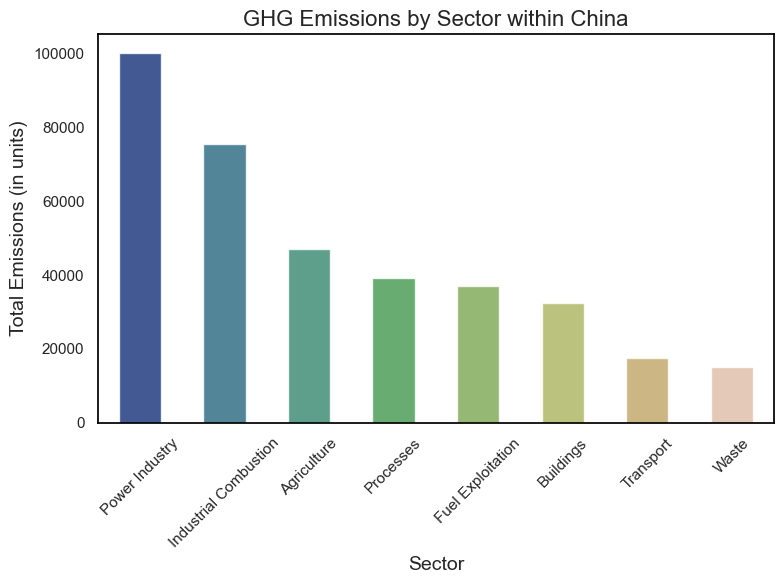

In [44]:
china_data = df[df['Country'] == 'China']
china_sector_totals = china_data.groupby('Sector')[years].sum().sum(axis=1)

sns.set(style="white", rc={"axes.edgecolor": 'black', "axes.facecolor": 'white'})

plt.figure(figsize=(8, 6))

china_sector_totals_sorted = china_sector_totals.sort_values(ascending=False)

colors = sns.color_palette("gist_earth", n_colors=len(china_sector_totals_sorted))

china_sector_totals_sorted.plot(kind='bar', width=0.5, color=colors, alpha = 0.8)

plt.title('GHG Emissions by Sector within China', fontsize=16)
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Total Emissions (in units)', fontsize=14)
plt.xticks(rotation=45, fontsize=11)
plt.grid(False)

ax = plt.gca()  # Get the current axes
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
plt.tight_layout()
plt.show()

**The Power Industry sector stands out with significantly higher emissions than other sectors.**
- This indicated its major role in China's GHG output. 
- Given the varied contribution of different sectors to overall emissions, policymakers can prioritize interventions and allocate resources to sectors where they will have the greatest impact. For instance, the relatively lower emissions from Waste suggest that while waste management is important, other sectors may offer more substantial opportunities for reduction.

## Part 3 - Predictive Modeling

The power industry stands as the sector with the most emissions globally, holding the position of the second highest emitter in both developed and developing countries. Given its significant impact on overall greenhouse gas emissions, it's crucial to focus our efforts on this sector. Let's start by modeling the GHG emissions in the power industry to identify key areas for intervention and develop strategies that can effectively reduce its carbon footprint.

**Model Selection:**
- Linear Regression was selected for its ability to handle our continuous emissions data over time, providing a straightforward method for projecting future trends based on past patterns.
- We began testing the time series for stationarity using the Augmented Dickey-Fuller (ADF) test, and results indicated non-stationarity with a p-value of 0.9707 and test statistics above critical values. After applying first and second differencing, the ADF test still showed signs of non-stationarity, suggesting a possible need for alternative approaches like SARIMA to handle underlying trends and seasonality.

**Feature Selection:**
- For modeling, we chose time-related variables that directly influence emissions trends. This focused approach allows us to examine how emissions have evolved over the years without introducing unnecessary complexity from unrelated variables.

### Linear Regression

Linear regression is highly effective for forecasting GHG emissions in the power industry due to its ability to model and predict trends based on historical data. By quantifying the relationship between time and emissions, it helps identify patterns and project future emissions under current conditions. This approach is particularly useful in planning and implementing strategies for emission reduction, enabling policymakers and industry leaders to set realistic targets and monitor progress effectively.

In [45]:
power_industry_data = df[df['Sector'] == 'Power Industry']

# Aggregating emissions by year for the Power Industry sector
power_industry_emissions_by_year = power_industry_data[years].sum()

power_industry_emissions_by_year

1971     3925.530783
1972     4204.476898
1973     4540.501928
1974     4619.937125
1975     4712.311043
1976     5072.123860
1977     5294.094635
1978     5467.166487
1979     5681.200843
1980     5824.168677
1981     5827.609814
1982     5823.428140
1983     5983.945571
1984     6188.701579
1985     6341.962492
1986     6504.404054
1987     6780.542673
1988     7018.197933
1989     7321.774324
1990     7680.608600
1991     7825.053804
1992     7962.633024
1993     7980.507062
1994     8058.569161
1995     8216.516329
1996     8557.573413
1997     8779.512515
1998     8958.081764
1999     9032.143771
2000     9426.418050
2001     9633.174527
2002     9774.972243
2003    10331.653358
2004    10711.105440
2005    11060.942420
2006    11494.806017
2007    11992.768806
2008    11996.815768
2009    11804.245450
2010    12595.764453
2011    13206.882422
2012    13478.760057
2013    13711.516724
2014    13780.816213
2015    13478.728055
2016    13535.763107
2017    13844.015024
2018    14297

Mean Squared Error: 209882.5448763707
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     2579.
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           3.04e-37
Time:                        21:56:38   Log-Likelihood:                -305.83
No. Observations:                  41   AIC:                             615.7
Df Residuals:                      39   BIC:                             619.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.

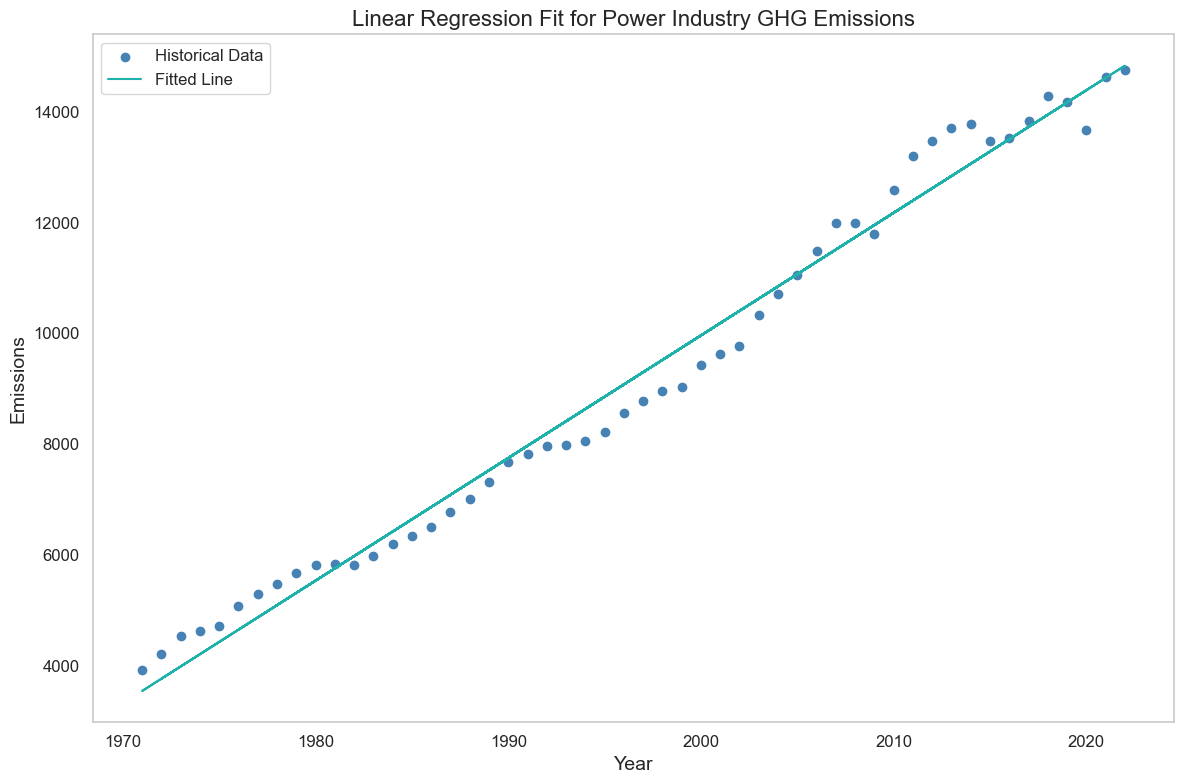

In [46]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sns.set(style="whitegrid")

X = np.array(years).reshape(-1, 1)
y = np.array(power_industry_emissions_by_year)

# Convert data to float and handle inf or NaN
X = np.nan_to_num(np.clip(X.astype(float), -np.finfo(np.float64).max, np.finfo(np.float64).max))
y = np.nan_to_num(np.clip(y.astype(float), -np.finfo(np.float64).max, np.finfo(np.float64).max))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit the OLS model and predict
model_sm = sm.OLS(y_train, X_train_sm)
results = model_sm.fit()
y_pred = results.predict(X_test_sm)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print(results.summary())

# Plotting the historical data, fitted line, and forecasts
plt.figure(figsize=(12, 8))
plt.scatter(X, y, color='steelblue', label='Historical Data')  # Use a more engaging color and transparency
plt.plot(X_train, results.predict(X_train_sm), color='lightseagreen', linestyle='-', linewidth=1.5, label='Fitted Line')  # Thicker line for visibility
plt.title('Linear Regression Fit for Power Industry GHG Emissions', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Emissions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()

**Linear Regression model appears to fit the historical data well, and the high R-squared value alongside a significant F-statistic indicates that the model is a strong predictor of GHG emissions in the power industry over the years analyzed.**

Forecasted GHG Emissions for the Next 10 Years:
Year 2023: 15060.66
Year 2024: 15282.21
Year 2025: 15503.75
Year 2026: 15725.30
Year 2027: 15946.85
Year 2028: 16168.39
Year 2029: 16389.94
Year 2030: 16611.48
Year 2031: 16833.03
Year 2032: 17054.57


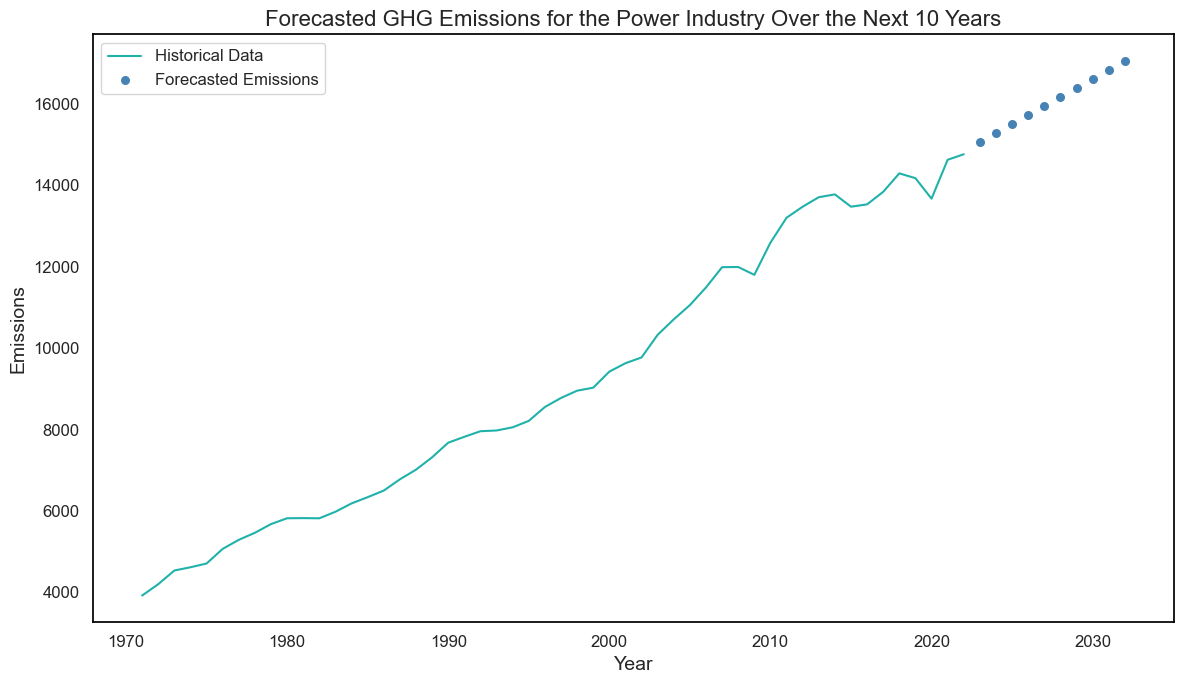

In [47]:
last_year = years[-1] 
future_years = np.arange(last_year + 1, last_year + 11).reshape(-1, 1)  # Next 10 years

# Add a constant to the predictor variables for compatibility with statsmodels
X_future = sm.add_constant(future_years)

# Use the trained model 'results' to predict GHG emissions for the future years
future_emissions = results.predict(X_future)

print("Forecasted GHG Emissions for the Next 10 Years:")
for year, emission in zip(future_years.flatten(), future_emissions):
    print(f"Year {year}: {emission:.2f}")

sns.set(style="white", rc={"axes.edgecolor": 'black', "axes.facecolor": 'white'})

plt.figure(figsize=(12, 7))
plt.plot(years, y, label='Historical Data', color='lightseagreen', linewidth=1.5)
plt.scatter(future_years, future_emissions, color='steelblue', label='Forecasted Emissions', s=30)  # Make forecast points stand out
plt.title('Forecasted GHG Emissions for the Power Industry Over the Next 10 Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Emissions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(False)

ax = plt.gca()
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
plt.tight_layout()
plt.show()

- The model **predicts a continued increase** in emissions **over the next decade**, suggesting that without significant changes in the power industry (like adoption of renewable energy or improvements in efficiency), emissions will keep rising.
- The forecasted emissions start at approximately **15,060 units in 2023** and grow to around **17,054 units by 2032**. This steady increase aligns with the historical trend and implies a consistent growth rate.
- With the forecast extending over a decade, there is a window of opportunity for the power industry and governments to implement changes that could alter this trajectory.

### Linear Regression on all Substances

We will apply linear regression to analyze trends across all substances, allowing us to predict future emissions and identify key areas for intervention effectively.

In [48]:
from sklearn.linear_model import LinearRegression

def prepare_and_fit_model(data, gas_type):
    
    gas_data = data[data['Substance'] == gas_type]

    # Aggregating emissions data by summing up emissions for each year
    year_columns = gas_data.columns[4:] 
    total_emissions_gas = gas_data[year_columns].sum()

    # Converting the aggregated data to a DataFrame suitable for regression
    emissions_df = total_emissions_gas.reset_index()
    emissions_df.columns = ['Year', 'Total Emissions']
    
    
    emissions_df['Year'] = emissions_df['Year'].astype(int)
    
    # Prepare X (years) and y (emissions) for regression
    X = emissions_df[['Year']]
    y = emissions_df['Total Emissions']
    
    model = LinearRegression()
    model.fit(X, y)
    
    return model, emissions_df

# Prepare and fit models for each gas type
model_co2, emissions_co2 = prepare_and_fit_model(df, 'CO2')
model_ch4, emissions_ch4 = prepare_and_fit_model(df, 'CH4')
model_n2o, emissions_n2o = prepare_and_fit_model(df, 'N2O')

emissions_co2.head(), emissions_ch4.head(), emissions_n2o.head()

(   Year  Total Emissions
 0  1970     15352.254030
 1  1971     15323.144136
 2  1972     16105.791097
 3  1973     17059.856630
 4  1974     17027.936955,
    Year  Total Emissions
 0  1970      7161.598142
 1  1971      7250.928826
 2  1972      7353.389705
 3  1973      7537.519041
 4  1974      7583.125422,
    Year  Total Emissions
 0  1970      1441.319611
 1  1971      1462.311156
 2  1972      1488.067081
 3  1973      1533.528251
 4  1974      1559.230416)

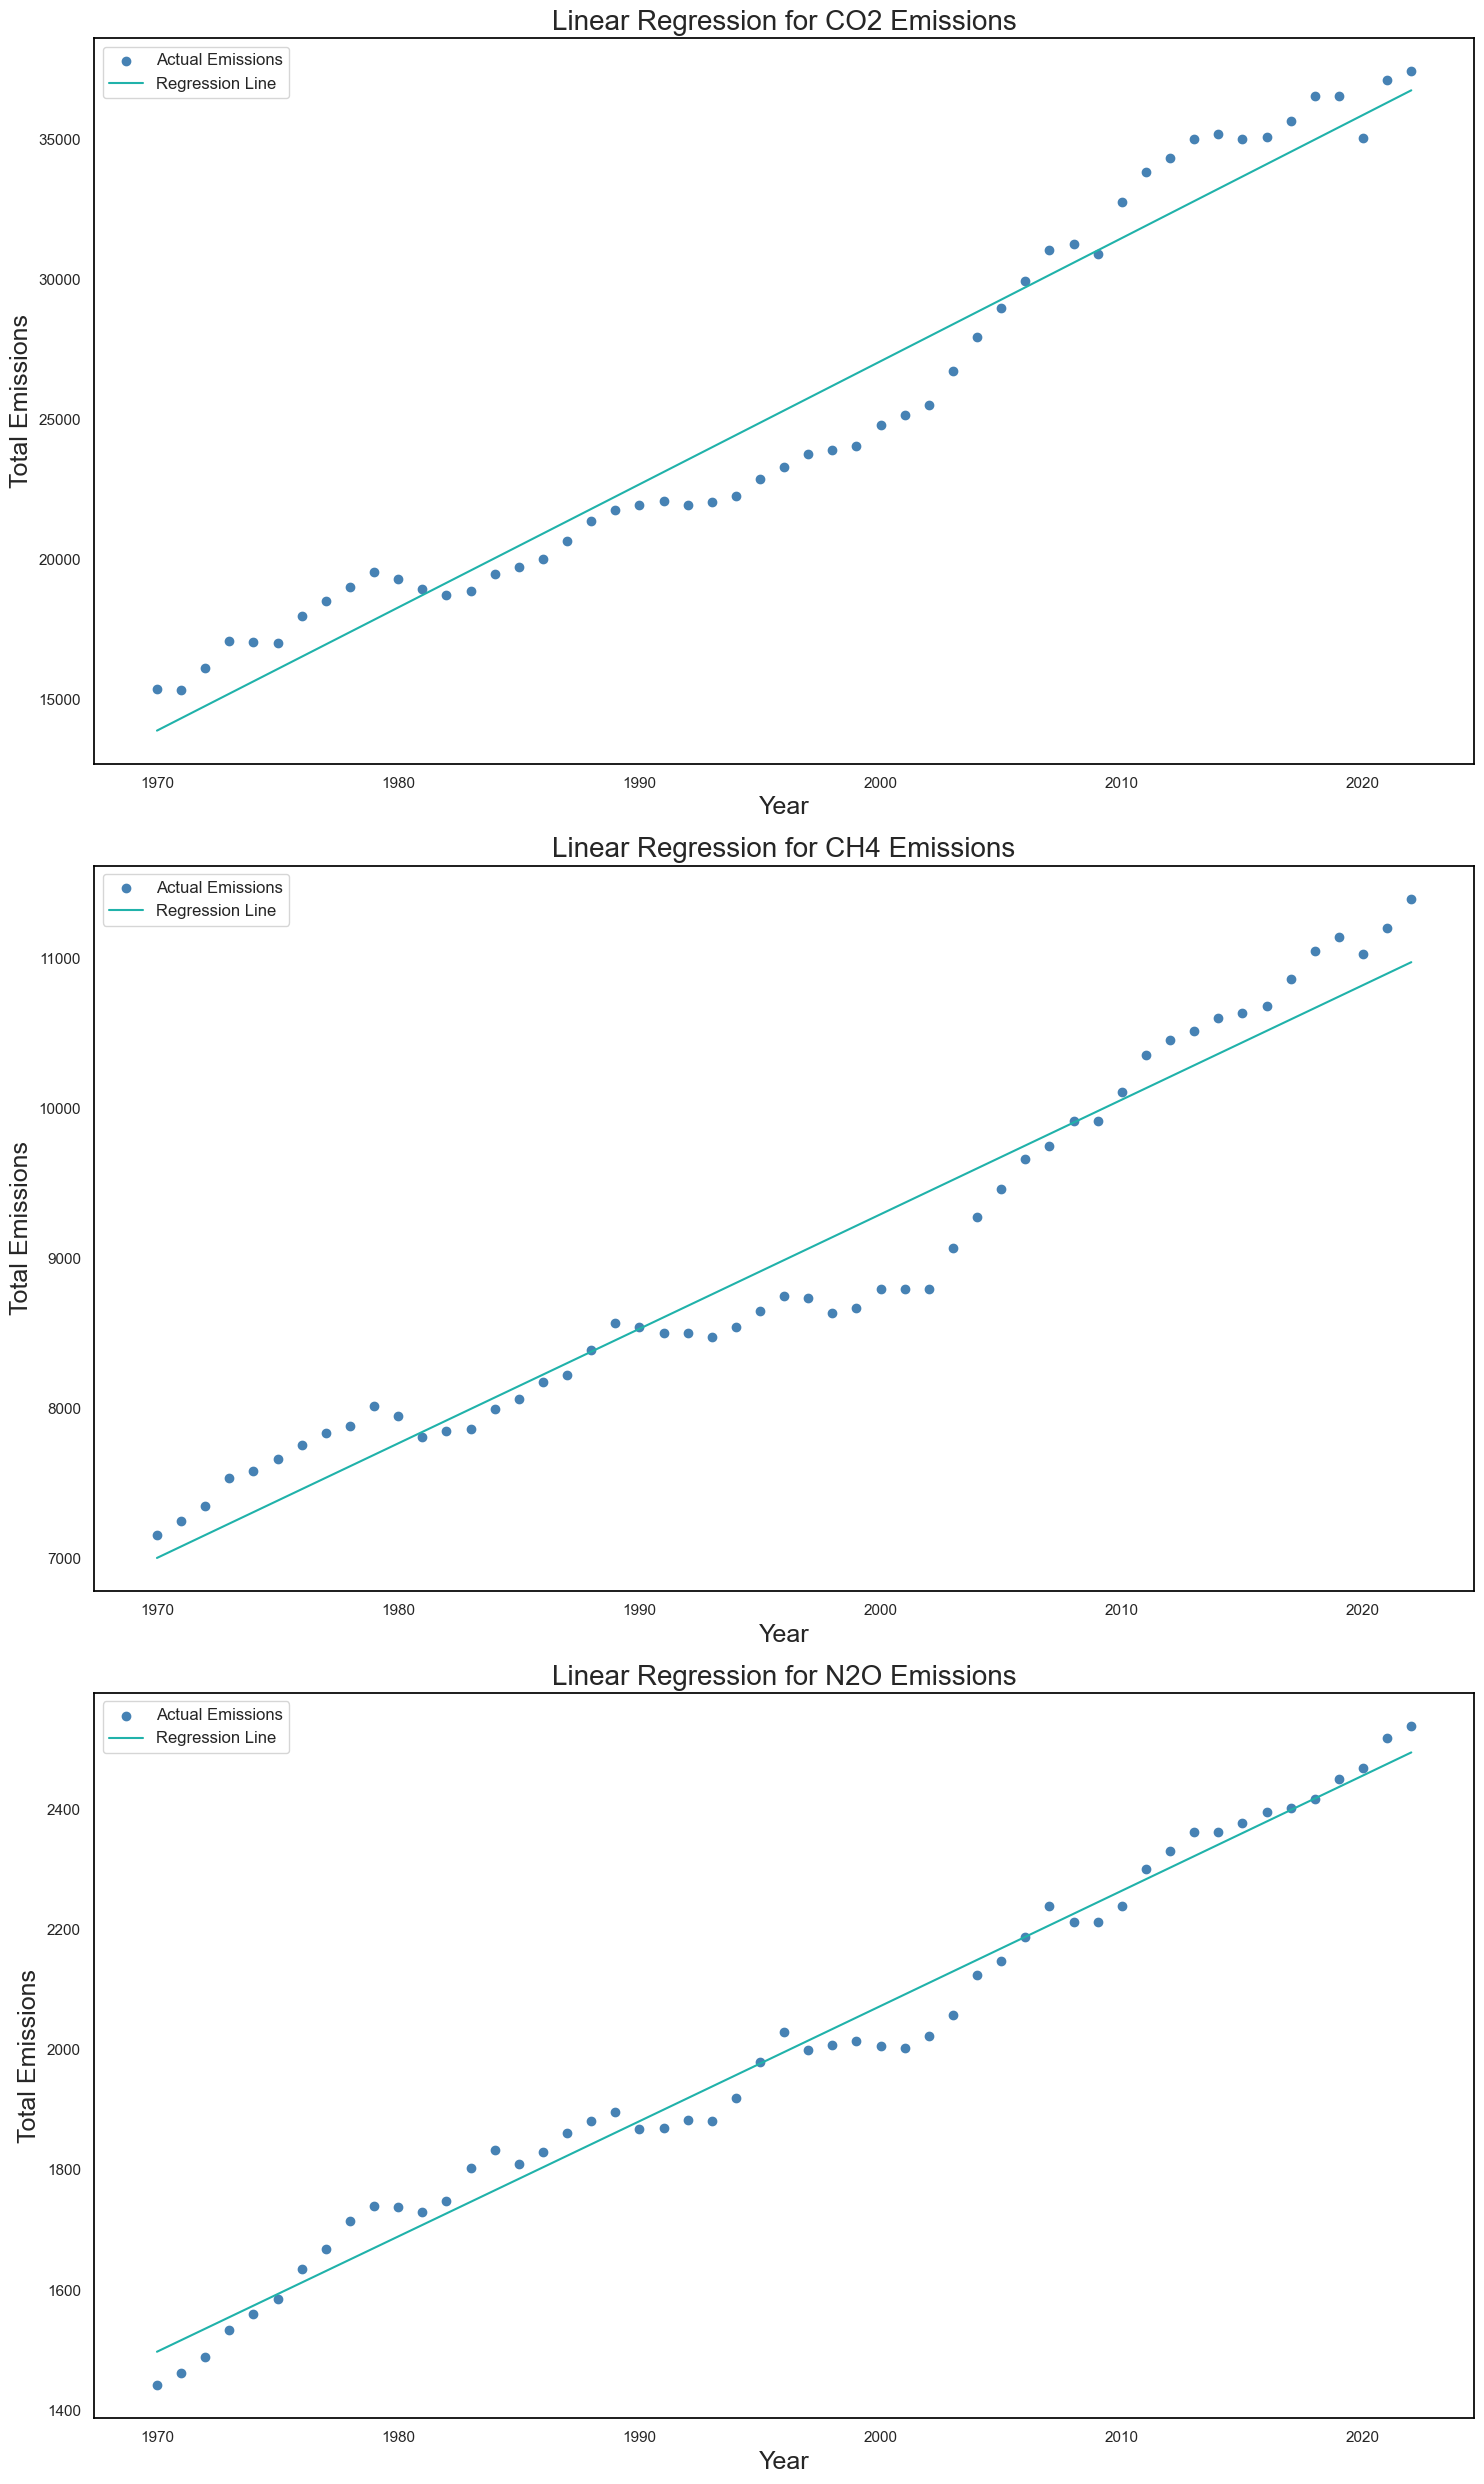

In [49]:
sns.set(style="white", rc={"axes.edgecolor": 'black', "axes.facecolor": 'white'})

def plot_regression_results(ax, X, y, model, title):
    ax.scatter(X, y, color='steelblue', label='Actual Emissions')  # Soft blue with transparency
    ax.plot(X, model.predict(X), color='lightseagreen', linewidth=1.5, label='Regression Line')  # Bold red line
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('Year', fontsize=18)
    ax.set_ylabel('Total Emissions', fontsize=18)
    ax.legend(fontsize=12)
    ax.grid(False)
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,25))

# Plotting for CO2
plot_regression_results(axes[0], emissions_co2[['Year']], emissions_co2['Total Emissions'], model_co2, 'Linear Regression for CO2 Emissions')
# Plotting for CH4
plot_regression_results(axes[1], emissions_ch4[['Year']], emissions_ch4['Total Emissions'], model_ch4, 'Linear Regression for CH4 Emissions')
# Plotting for N2O
plot_regression_results(axes[2], emissions_n2o[['Year']], emissions_n2o['Total Emissions'], model_n2o, 'Linear Regression for N2O Emissions')

plt.tight_layout()
plt.show()


**CO2 Emissions Trend:**
- The plot shows a continuous upward trend in CO2 emissions, with the regression line closely following the actual data points. - The steady increase suggests a strong positive correlation between time and CO2 emissions.

**CH4 Emissions Trend:**
- CH4 emissions also exhibit a rising trend over the years. The regression line indicates a consistent rate of increase, suggesting that without intervention, CH4 emissions may continue to rise at a similar pace.

**N2O Emissions Trend:**
- For N2O, the plot again shows a consistent increase in emissions over time. The regression line indicates a steady growth, parallel to the trends observed for CO2 and CH4.

## Part 4 - Recommendations for Emission Reduction and Environment Policy

<center>
    <img src="images/Environmental_Policy_Recommendations.jpeg" width=500 />
</center>

**Effective strategies to reduce greenhouse gas emissions across different sectors and substances include:**

## Sector-Specific Strategies
- For the industrial sector, tightening regulations, enhancing the use of cleaner technologies, and improving manufacturing and energy production processes can help reduce emissions[1][3].
- In the agriculture sector, promoting sustainable farming practices, optimizing fertilizer use, and implementing methane-reduction techniques in livestock management are important[3].

## Substance-Specific Actions
- To address carbon dioxide emissions, increasing energy efficiency, expanding renewable energy, and developing carbon capture technologies are key[2].
- For methane and other greenhouse gases, targeting reductions in the oil, gas, and waste sectors, as well as limiting the use of hydrofluorocarbons through legislation, can be effective[2][3].

## Geographical and Policy Considerations
- Strategies should be customized based on the economic and infrastructural conditions of developed versus developing nations, with support provided to developing countries[3].
- Enhancing international agreements and encouraging ambitious emission reduction targets globally can drive broader impact[1][3].

## Recommendations for Governments and International Bodies
- Invest in advanced emissions monitoring technology and upgrade infrastructure to support low-emission technologies, especially in high-emission areas[2][3].
- Implement and enforce stricter global emissions regulations, and promote policies that incentivize emission reductions, such as carbon pricing and clean energy subsidies[2][3].
- Increase public awareness through education and media campaigns, and engage various stakeholders to support emissions reduction efforts[2].

### Citations:

[1] https://sciencebasedtargets.org/resources/files/SBT_Value_Chain_Report-1.pdf

[2] https://net0.com/blog/carbon-mitigation

[3] https://climate.ny.gov/resources/scoping-plan/-/media/project/climate/files/Chapter14Industry.pdf

[4] https://www.jabil.com/blog/scope-1-scope-2-emissions.html

[5] https://www.psrc.org/sites/default/files/2022-03/greenhouse_gas_emission_reduction_strategies.pdf

[6] https://edgar.jrc.ec.europa.eu/report_2023 [Dataset]

<center>
    <img src="images/ThankYou.jpg" width=500 />
</center>